In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

features = pd.read_csv("data/combinedData.csv")

features = features.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])

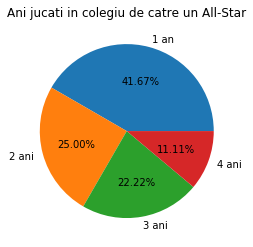

In [5]:
allStars = features[features["allStar"] == 1]
allStars = allStars.groupby(["year_drafted", "round", "pick_overall"])["player"].count()
allStars = allStars.value_counts()
plt.pie(allStars, labels=["1 an", "2 ani", "3 ani", "4 ani"], autopct='%1.2f%%')
plt.title("Ani jucati in colegiu de catre un All-Star")
plt.show()

In [6]:
features = features.fillna(features.median())
# features = features.dropna()
features.head()

,player,class,season,pos,school_name,conf_abbr,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,allStar
0,Stephen Curry,JR,2008-09,G,Davidson,Southern,34.0,1145.0,312,687,182,351,130,336,220,251,21.0,130.0,151,189,86,8,126.0,81.0,974,21.2,4.1,2.9,7.4,0.604,0.549,6.0,14.8,6.9,40.2,1.9,0.6,13.5,38.3,114.1,97.9,6.4,3.6,9.9,425.0,2009,1,7,1
1,J.J. Redick,SR,2005-06,G,Duke,ACC,36.0,1336.0,302,643,163,313,139,330,221,256,7.0,64.0,71,95,52,2,90.0,54.0,964,21.2,4.1,2.9,7.4,0.630,0.578,6.0,14.8,3.1,15.8,1.9,0.1,10.5,31.5,114.1,97.9,6.7,1.0,7.8,425.0,2006,1,11,0
2,Justin Wright-Foreman,SR,2018-19,G,Hofstra,CAA,35.0,1321.0,330,646,220,387,110,259,178,206,12.0,129.0,141,102,30,7,91.0,67.0,948,28.9,7.0,-3.7,3.2,0.637,0.596,1.2,11.5,6.6,17.4,1.3,0.6,10.9,33.0,123.8,108.7,6.3,1.0,7.4,844.0,2019,2,53,0
3,Doug McDermott,SR,2013-14,F,Creighton,Big East,35.0,1181.0,330,627,234,413,96,214,178,206,57.0,187.0,244,55,8,5,62.0,67.0,934,32.8,9.8,-1.6,8.2,0.644,0.603,6.4,17.8,12.6,11.5,0.4,0.5,7.9,36.2,127.4,106.0,6.3,1.4,7.7,788.0,2014,1,11,0
4,Stephen Curry,SO,2007-08,G,Davidson,Southern,36.0,1193.0,317,656,155,287,162,369,135,151,28.0,137.0,165,104,73,14,93.0,85.0,931,21.2,4.1,2.9,7.4,0.640,0.607,6.0,14.8,11.0,12.7,1.9,1.8,11.3,22.9,114.1,97.9,7.0,3.3,10.3,425.0,2009,1,7,1


In [35]:
allStars = features[features["allStar"] == 1]
numberAllStars = allStars["player"].count()
theRest = features[features["allStar"] == 0]
numberRest = theRest["player"].count()
print("All-Stars: ", numberAllStars)
print("Rest: ", numberRest)
print("Total: ", numberAllStars + numberRest)

All-Stars:  73
Rest:  1464
Total:  1537


In [7]:
# import random

# classRatio = 0.1
# allStars = features[features["allStar"] == 1]
# numberAllStars = allStars["player"].count()
# theRest = features[features["allStar"] == 0]
# theRest = theRest.groupby(["year_drafted", "round", "pick_overall", "player"], as_index=False).mean()
# numberRest = int(np.ceil(numberAllStars/classRatio))
# # theRest = theRest.sample(n=numberRest, random_state=1)
# features = pd.concat([allStars, theRest])
# print("Class ratio: ", numberAllStars/numberRest)
# print("All-Stars: ", numberAllStars)
# print("Rest: ", numberRest)
# print("Total: ", numberAllStars + numberRest)
# theRest.head()

In [8]:
# create per_game stats and drop the normal stats
features["pts_pg"] = features["pts"] / features["g"]
features["fg_p"] = features["fg"] / features["fga"]
features["fg2_p"] = features["fg2"] / features["fg2a"]
features["fg3_p"] = features["fg3"] / ( features["fg3a"]  +.000000001)
features["ft_p"] = features["ft"] / (features["fta"] + +.000000001)
features["trb_p"] = features["trb"] / features["g"]
features["ast_p"] = features["ast"] / features["g"]
features["stl_p"] = features["stl"] / features["g"]
features["blk_p"] = features["blk"] / features["g"]

In [9]:
mean_statistics = features.groupby(["allStar"]).mean()
mean_statistics.head(40)

,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,per,obpm,dbpm,bpm,ts_pct,efg_pct,orb_pct,drb_pct,trb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg_pct,off_rtg,def_rtg,ows,dws,ws,pprod,year_drafted,round,pick_overall,pts_pg,fg_p,fg2_p,fg3_p,ft_p,trb_p,ast_p,stl_p,blk_p
allStar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,32.699454,921.842896,147.248634,307.294399,114.843579,219.282104,32.405055,88.012295,90.159153,123.409836,51.450137,123.428962,174.879098,70.360656,33.462432,24.983607,62.637295,71.947404,417.061475,21.099180,4.031694,3.006899,7.238798,0.565426,0.530796,6.342281,15.320423,11.229713,14.284631,1.998907,2.658265,15.180669,23.005123,113.667077,97.674522,2.325205,1.786339,4.112363,417.943989,2011.685109,1.568306,33.172131,12.629449,0.482570,0.520372,0.299840,0.717147,5.317502,2.128339,1.015783,0.762010
1,33.027397,965.260274,169.178082,334.931507,138.712329,254.068493,30.465753,80.863014,114.205479,156.136986,66.493151,156.630137,223.123288,86.986301,42.767123,33.986301,73.643836,78.465753,483.027397,22.726027,4.565753,3.241096,8.136986,0.589521,0.553808,6.563014,16.031507,12.980822,17.897260,2.164384,2.728767,15.812329,24.347945,114.953425,96.415068,3.083562,2.567123,5.646575,443.082192,2008.287671,1.109589,11.561644,14.597018,0.514707,0.544277,0.292954,0.721872,6.626119,2.630329,1.290684,0.993383


In [10]:
def plotGroupBarPlot(data, feature_list):
    df = data.loc[feature_list]
    df.plot(kind="bar")
    plt.show()

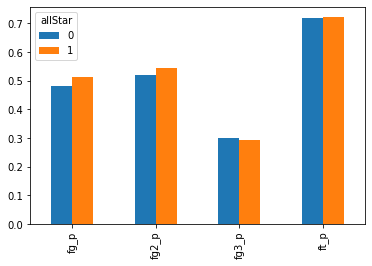

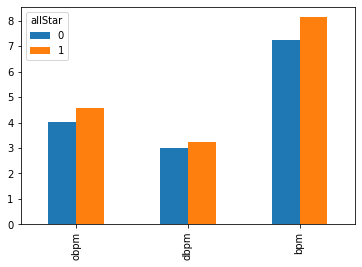

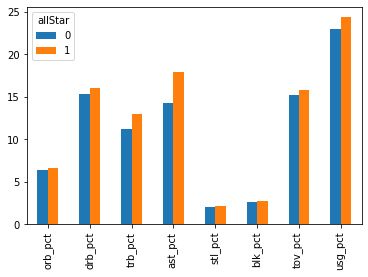

In [11]:
plotGroupBarPlot(mean_statistics.T, ["fg_p", "fg2_p", "fg3_p", "ft_p"])
plotGroupBarPlot(mean_statistics.T, ["obpm", "dbpm", "bpm"])
plotGroupBarPlot(mean_statistics.T, ["orb_pct", "drb_pct", "trb_pct", "ast_pct",
                                     "stl_pct", "blk_pct", "tov_pct", "usg_pct"])

In [12]:
from sklearn.metrics import classification_report as scor
from sklearn.metrics import roc_curve, auc, roc_auc_score

def rocCurve(test_labels, predictions):
    fpr, tpr, thresholds = roc_curve(test_labels, predictions)
    auc = roc_auc_score(test_labels, predictions)
    print('AUC: %.3f' % auc)
    ns_probs = [0 for _ in range(len(test_labels))]
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(test_labels, predictions)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    

def evaluate(model, test_features, test_labels, treshold):
#     print("Test labels",test_labels)
    predictions = model.predict(test_features)
#     print("Predictions",predictions)
    print(scor(test_labels, np.where(predictions > treshold, 1, 0),
                target_names = ["NOT All-Star", "All-Star"]))
    rocCurve(test_labels, predictions)

In [13]:
def printFeatureImportance(rf, feature_list):
    importances = list(rf.feature_importances_)
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    return feature_importances

In [14]:
def getTrainTest(features):
    np_labels = np.array(features["allStar"])
    temp_features = features.drop(columns=["allStar"])
    feature_list = list(features.columns)
    np_features = np.array(temp_features)
    train_features, test_features, train_labels, test_labels = train_test_split(np_features, 
                                                                                np_labels,
                                                                                test_size = 0.25,
                                                                                random_state = 42)
    return train_features, test_features, train_labels, test_labels, feature_list

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def randomForest_train_variableImportane(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    rf = RandomForestClassifier(n_estimators= 200, random_state=42)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list
    

In [16]:
features.columns

Index(['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr', 'g',
       'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'per', 'obpm',
       'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct', 'trb_pct',
       'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg',
       'def_rtg', 'ows', 'dws', 'ws', 'pprod', 'year_drafted', 'round',
       'pick_overall', 'allStar', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p', 'ft_p',
       'trb_p', 'ast_p', 'stl_p', 'blk_p'],
      dtype='object')

In [17]:
list_meta_data = ['player', 'class', 'season', 'pos', 'school_name', 'conf_abbr']
list_numeric_features = ['per', 'obpm', 'dbpm', 'bpm', 'ts_pct', 'efg_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'ows', 'dws', 'ws', 'pprod',
       'round', 'pick_overall', 'pts_pg', 'fg_p', 'fg2_p', 'fg3_p',
       'ft_p', 'trb_p', 'ast_p', 'stl_p', 'blk_p']
fetures_select_all = list_numeric_features + ["allStar"]

In [18]:
rf_base, test_features_base, test_labels_base, feature_list_base = randomForest_train_variableImportane(features[fetures_select_all])

              precision    recall  f1-score   support

NOT All-Star       0.95      0.99      0.97       365
    All-Star       0.00      0.00      0.00        20

    accuracy                           0.94       385
   macro avg       0.47      0.50      0.49       385
weighted avg       0.90      0.94      0.92       385

AUC: 0.497


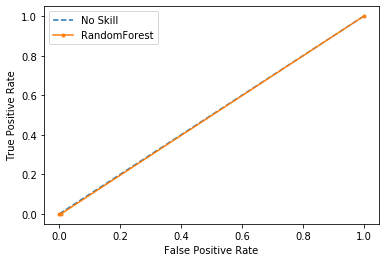

Variable: pick_overall         Importance: 0.16
Variable: ws                   Importance: 0.07
Variable: dws                  Importance: 0.05
Variable: trb_p                Importance: 0.05
Variable: pts_pg               Importance: 0.04
Variable: ft_p                 Importance: 0.04
Variable: ast_p                Importance: 0.04
Variable: stl_p                Importance: 0.04
Variable: ts_pct               Importance: 0.03
Variable: efg_pct              Importance: 0.03
Variable: trb_pct              Importance: 0.03
Variable: ast_pct              Importance: 0.03
Variable: blk_pct              Importance: 0.03
Variable: tov_pct              Importance: 0.03
Variable: usg_pct              Importance: 0.03
Variable: ows                  Importance: 0.03
Variable: fg_p                 Importance: 0.03
Variable: fg2_p                Importance: 0.03
Variable: fg3_p                Importance: 0.03
Variable: blk_p                Importance: 0.03
Variable: per                  Importanc

In [19]:
treshold = 0.5
evaluate(rf_base, test_features_base, test_labels_base, treshold)
feature_importans = printFeatureImportance(rf_base, feature_list_base)

In [20]:
# we take the firs 10 most important features
list_selected_features = [x[0] for x in feature_importans[:10]]
list_selected_features.append("allStar")
rf_top, test_features_top, test_labels_top, feature_list_top = randomForest_train_variableImportane(features[list_selected_features])

              precision    recall  f1-score   support

NOT All-Star       0.95      0.99      0.97       365
    All-Star       0.33      0.05      0.09        20

    accuracy                           0.95       385
   macro avg       0.64      0.52      0.53       385
weighted avg       0.92      0.95      0.93       385

AUC: 0.522


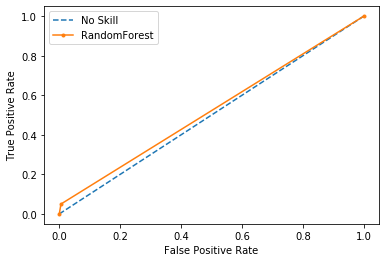

In [21]:
treshold = 0.5
evaluate(rf_top, test_features_top, test_labels_top, treshold)

              precision    recall  f1-score   support

NOT All-Star       0.95      0.99      0.97       365
    All-Star       0.33      0.05      0.09        20

    accuracy                           0.95       385
   macro avg       0.64      0.52      0.53       385
weighted avg       0.92      0.95      0.93       385

AUC: 0.522


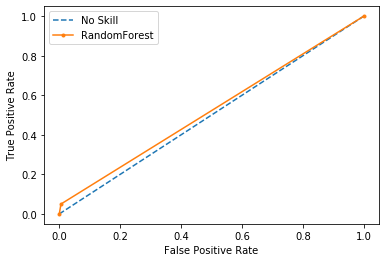

In [22]:
treshold = 0.5
evaluate(rf_top, test_features_top, test_labels_top, treshold)

In [23]:
from sklearn.ensemble import RandomForestClassifier

def randomForestWeight(features):
    train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features)
    # Train moodel
    weight = "balanced"
    rf = RandomForestClassifier(n_estimators= 1000, random_state=42, class_weight=weight)
    rf.fit(train_features, train_labels);
    return rf, test_features, test_labels, feature_list

In [24]:
rf_weight_top, test_features_weight_top , test_labels_weight_top, feature_list_weight_top = randomForestWeight(features[list_selected_features])

              precision    recall  f1-score   support

NOT All-Star       0.95      1.00      0.97       365
    All-Star       0.50      0.05      0.09        20

    accuracy                           0.95       385
   macro avg       0.73      0.52      0.53       385
weighted avg       0.93      0.95      0.93       385

AUC: 0.524


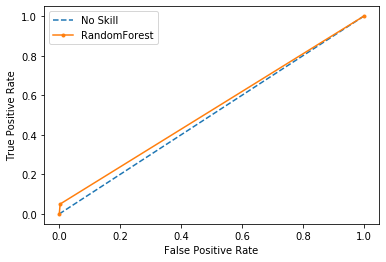

In [25]:
treshold = 0.5
evaluate(rf_weight_top, test_features_weight_top, test_labels_weight_top, treshold)

In [26]:
rf_weight_base, test_features_weight_base, test_labels_weight_base, feature_list_weight_base = randomForestWeight(features[fetures_select_all])

              precision    recall  f1-score   support

NOT All-Star       0.95      0.99      0.97       365
    All-Star       0.25      0.05      0.08        20

    accuracy                           0.94       385
   macro avg       0.60      0.52      0.53       385
weighted avg       0.91      0.94      0.92       385

AUC: 0.521


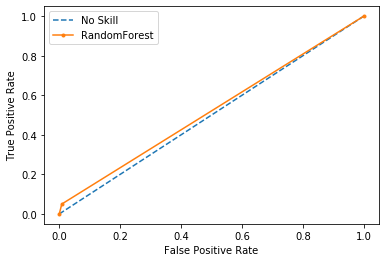

In [27]:
treshold = 0.5
evaluate(rf_weight_base, test_features_weight_base, test_labels_weight_base, treshold)

In [28]:

train_features, test_features, train_labels, test_labels, feature_list = getTrainTest(features[fetures_select_all])

In [36]:
from sklearn.model_selection import GridSearchCV
max_features = [None] + [int(x) for x in range(15,26,1)]
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators' : [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)],
    'max_features' : max_features,
    'max_depth':[int(x) for x in range(2,10,2)],
    'class_weight' : ["balanced", None],
    'bootstrap' : [True, False]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search_new = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring="f1", cv = 3, 
                           n_jobs = 10, verbose = 2)
grid_search_new.fit(train_features, train_labels)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:    7.1s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:   23.6s
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:   52.0s
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:  2.8min
[Parallel(n_jobs=10)]: Done 1438 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done 1965 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 2572 tasks      | elapsed:  8.3min
[Parallel(n_jobs=10)]: Done 3261 tasks      | elapsed: 10.9min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed: 14.1min
[Parallel(n_jobs=10)]: Done 4881 tasks      | elapsed: 17.3min
[Parallel(n_jobs=10)]: Done 5760 out of 5760 | elapsed: 22.3min finished
/home/andrei/Facultate/tcri-all-star-prediction/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `ii

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

              precision    recall  f1-score   support

NOT All-Star       0.97      0.94      0.96       365
    All-Star       0.31      0.50      0.38        20

    accuracy                           0.92       385
   macro avg       0.64      0.72      0.67       385
weighted avg       0.94      0.92      0.93       385

AUC: 0.720


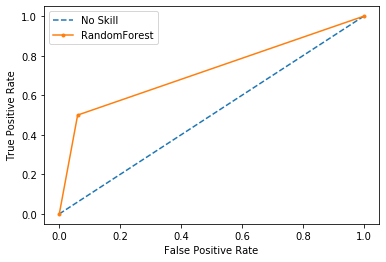

In [39]:
evaluate(grid_search_new.best_estimator_, test_features, test_labels, treshold)

In [37]:
random_best = RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=15,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=94, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
random_best.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=15,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=94, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

              precision    recall  f1-score   support

NOT All-Star       0.97      0.91      0.94       365
    All-Star       0.25      0.55      0.34        20

    accuracy                           0.89       385
   macro avg       0.61      0.73      0.64       385
weighted avg       0.94      0.89      0.91       385

AUC: 0.730


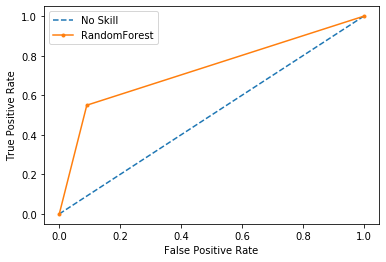

In [38]:
evaluate(random_best, test_features, test_labels, treshold)

In [32]:
from sklearn.tree import export_graphviz
# Export as dot file
fetures_name = features[fetures_select_all].drop(columns="allStar").columns
export_graphviz(random_best.estimators_[13], out_file='tree.dot', 
                feature_names = fetures_name,
                class_names = ["All-Star", "NOT All-Star"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'bestForestMedieSezon.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'bestForestMedieSezon.png')